<a href="https://colab.research.google.com/github/Kexue-Charlene/INDE577/blob/main/Supervised%20Learning/Preceptron/Project_Perceptron_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

The perceptron algorithm was inspired by neurons which is the  basic processing units in the brain. 
Perceptron is a single layer neural network and a multi-layer perceptron is called Neural Networks. 
Perceptron, a supervised learning, is a binary linear classifier. It helps to classify the given input data. 



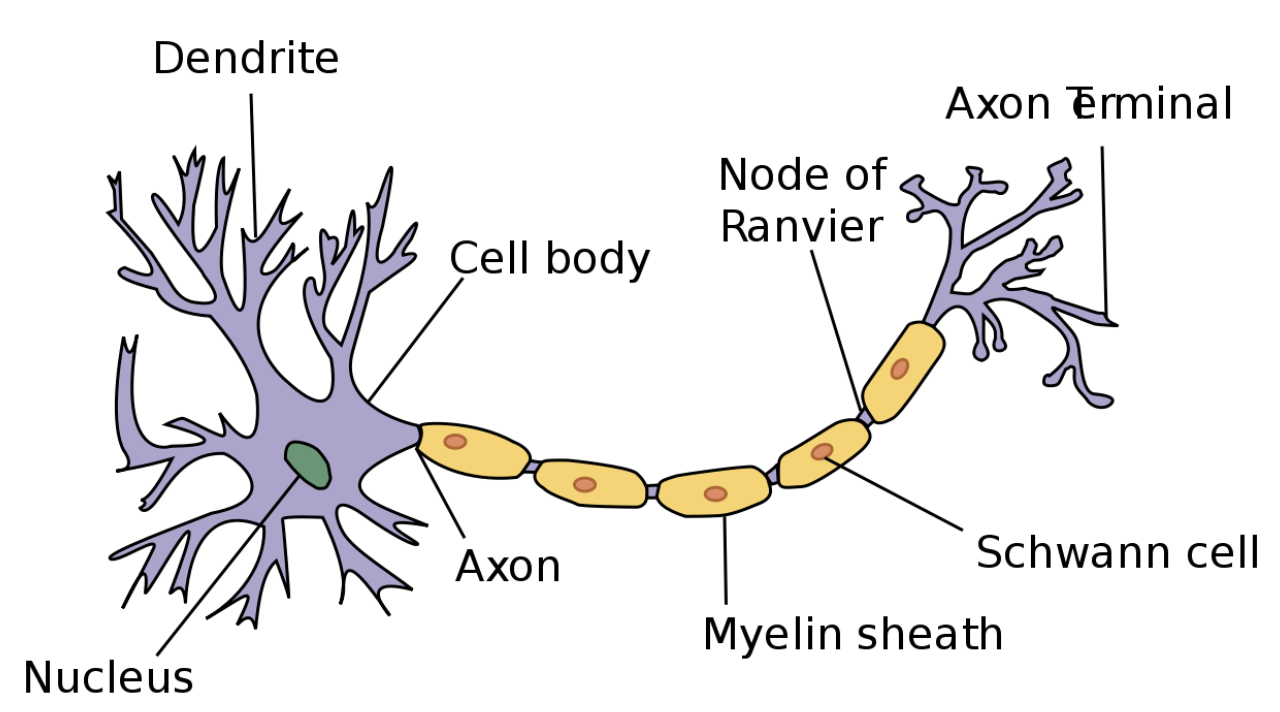

The perceptron includes 4 parts:
* Input values or one input layer
* Weights and Bias
* Net sum
* Activation Function 



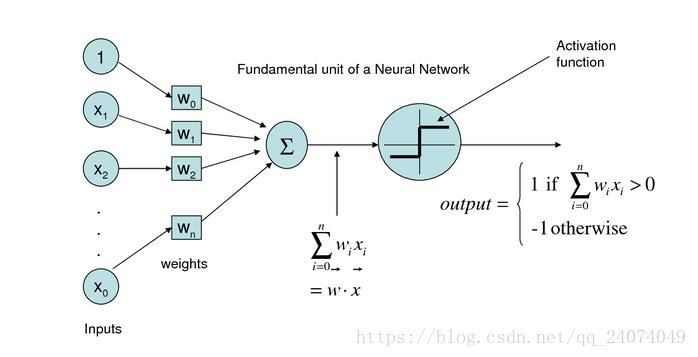

Here are some steps to implement perceptron: 
1. All the inputs x are multiplied with their weights w. We usually all it k. 
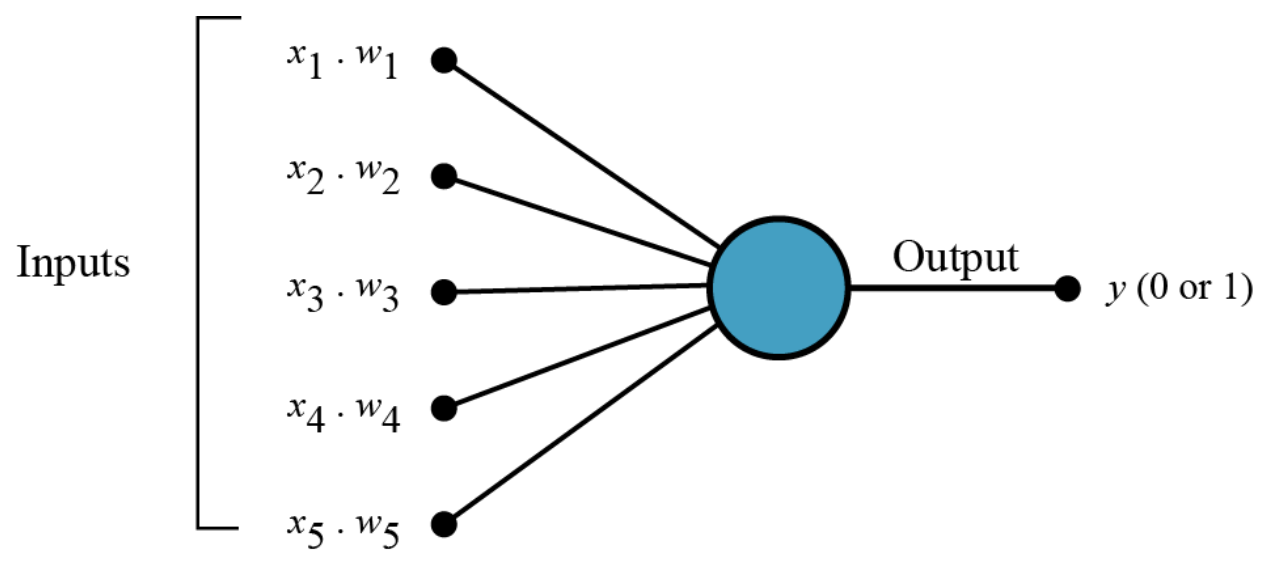
2. Sum up all the multiplied values and call them weighted sum. 
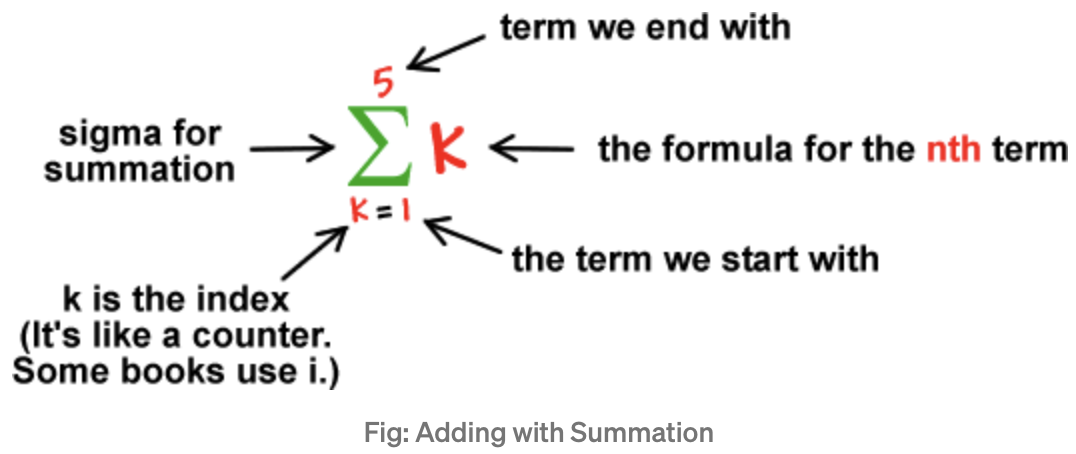
3. Apply the weighted sum to the correct Activation Function

The following packages will be used in this project:
*   matplotlib.pyplot: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [documentation](https://numpy.org/devdocs/)
*   pandas: [documentation](https://pandas.pydata.org/docs/)
*   sklearn: [documentation](https://scikit-learn.org/stable/)
*   seaborn: [documentation](https://seaborn.pydata.org/)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets

## Data information
The dataset is from sklearn called make_blobs[link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html). It has 150 samples and 2 features. Here is the scatter plot. Clearly see there are two groups. 
Out goal is to classify the two groups. 

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

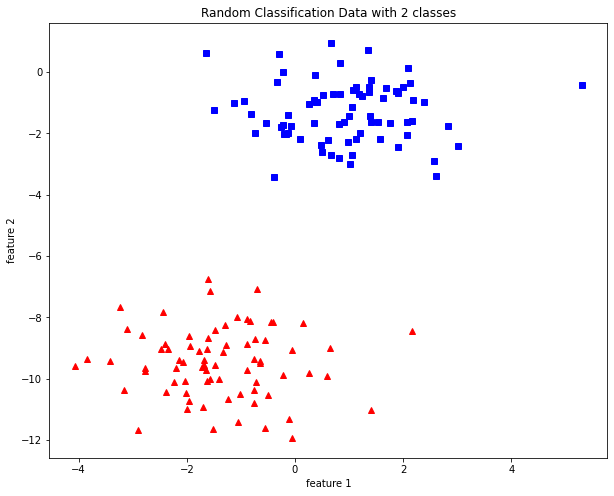

In [ ]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

Change labels to match 1 and -1 labels. We hack away and add bias term(1) to make our desired X_bar martix.

In [ ]:
for i, label in enumerate(y):
    if label==0.0:
        y[i]=1.0
    elif label==1.0:
        y[i]=-1.0
X_bar=[]
for x in X:
    X_bar.append(np.append(x,np.ones(1)))
X_bar=np.array(X_bar)
X_bar[1:5]

array([[ -0.55022637, -11.61661524,   1.        ],
       [  1.38862276,  -1.4358059 ,   1.        ],
       [  1.37033956,  -0.64022071,   1.        ],
       [ -0.88060639,  -9.7094674 ,   1.        ]])

## Activation function 
Build up an avtivation function. If X*y >0, the output equal to 1. If X*y<=0, the output equalto -1. 
## Loss function 
Here we use a loss function：$L = \frac{1}{2} \sum_{i = 1}^n (x_i \hat{w}_i - y_i)^2$


In [ ]:
def sign(x,y):
    # the input vectors here should be numpy arrays
    if x@y>0:
        return 1.0
    else:
        return -1.0
def L(w,features=X_bar,labels=y):
    return sum(.5*(sign(w,x)-labels[i])**2 for i, x in enumerate(features))

## Gradient Descent

Gradient Descent can help to correct the weight vector to conduct a better prediction. We set $\alpha$ as 0.5 which is learning rate. The gradient approximate is $(\hat{y}_i - y_i)\bar{x}_i$ because the next derivative is unable to calculated. We set $w = w - \alpha(\hat{y}_i - y_i)\bar{x}_i$ 


## Epochs
Epochs is the number of iterations. We need to keep iterating through our data until one epoch when our perceptron has seen all of the training data once. Usually, we run our learning algorithm for multiple epochs.   
Setup epochs and learning rate and randomly sample weights from uniform distribution. 

## Visualized Loss 
Visualize the loss at each epoch. The loss is unstable. Sometimes they are zero and sometimes they are above 100. 

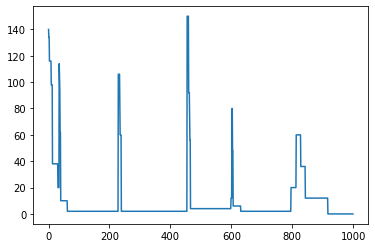

In [ ]:
def grad_approx(w,x,y):
    return (sign(w,x)-y)*x
#set epochs
epochs=1000
#set alpha
alpha=0.5
#random intial weights
w=np.random.rand(3)
losses=[]
for _ in range(epochs):
    random_index=np.random.randint(100)
    w=w-alpha*grad_approx(w,X_bar[random_index],y[random_index])
    losses.append(L(w))
plt.plot(losses)

In [ ]:
print(f"The Loss before implementing stochastic approx gradient descent={L(w)}")

The Loss before implementing stochastic approx gradient descent=4.0


# Result
Perceptron is usually used to classify the data into two parts. Therefore, it is also known as a Linear Binary Classifier. The orange line is decision boundary. We can see from the above decision boundary graph that we are able to separate the green and yellow classes perfectly. 

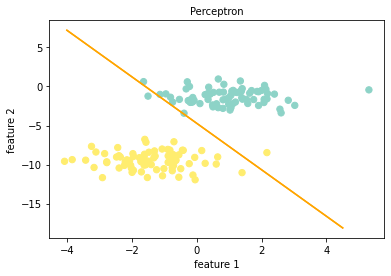

In [ ]:

domain = np.arange(-4,5,.5)
line = [(w[0]*x + w[2])/-w[1] for x in domain]
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap='Set3')  
plt.plot(domain,
        line,
        label = 'seperator',
        color = 'orange')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

plt.title("Perceptron",fontsize=10)
plt.plot(domain,line,label = 'seperator',color = 'orange')

# Reference
Zenva Pty Ltd, Python Machine Learning, 2021 from https://pythonmachinelearning.pro/perceptrons-the-first-neural-networks/